# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [2]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

basket = 100
apple = 60
orange = 40
p = apple/basket
q = orange/basket
print(f"p = {p}, q = {q}")

p = 0.6, q = 0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [10]:
# first 5 fruits are all apples:
first_five = p**5

# first 5 fruits are all apples, and the next 15 are oranges:
first_five_and_next_15 = p**5 * q**15

print(f"first five fruits are all apples: {first_five:.3f}")
print(f"first five fruits are all apples, and the next 15 are oranges: {first_five_and_next_15:.3f}")

# since rounding to 3 decimals is not very sensible here, let's round to 12 decimals:
print(f"Rounding to 12 decimals: {first_five_and_next_15:.12f}")

first five fruits are all apples: 0.078
first five fruits are all apples, and the next 15 are oranges: 0.000
Rounding to 12 decimals: 0.000000083494


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [ ]:
# here we're gonna use binom from scipy.stats
from scipy.stats import binom

n = 20  # number of trials
k = 5   # number of apples
p = 0.6 # probability of apple

prob = binom.pmf(k, n, p) # pmf because we want the probability of exactly 5 apples
print(f"P(exactly 5 apples out of 20): {prob:.8f}")

P(exactly 5 apples out of 20): 0.00129449


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [16]:
# P(X < 5) = P(X <= 4)
prob_less_than_5 = binom.cdf(4, n, p)
print(f"Probability of getting less than 5 apples: {prob_less_than_5:.6f}")

Probability of getting less than 5 apples: 0.000317


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

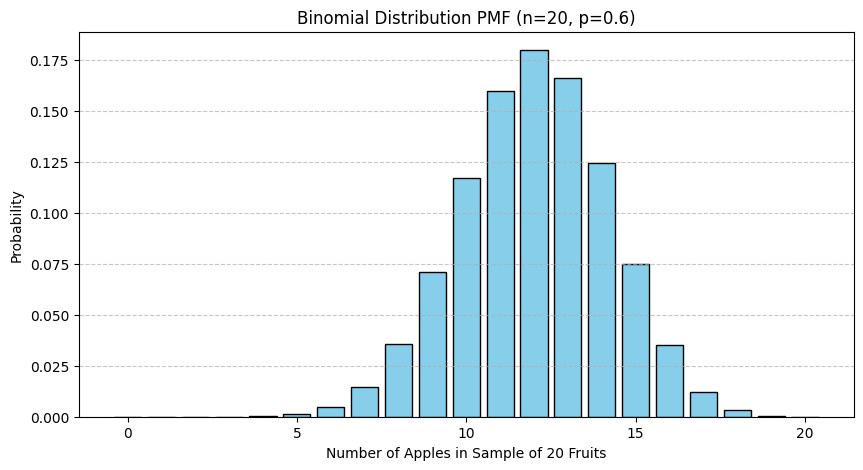

In [17]:
# Range of possible outcomes
x = np.arange(0, n + 1)
pmf = binom.pmf(x, n, p)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title("Binomial Distribution PMF (n=20, p=0.6)")
plt.xlabel("Number of Apples in Sample of 20 Fruits")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [24]:
λ = 2.3  # average goals
k = 5    # number of goals we want to find probability for

# Poisson probability
poisson_prob = (math.exp(-λ) * (λ**k)) / math.factorial(k)
print(f"Probability of exactly 5 goals: {poisson_prob:.6f}")

Probability of exactly 5 goals: 0.053775


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

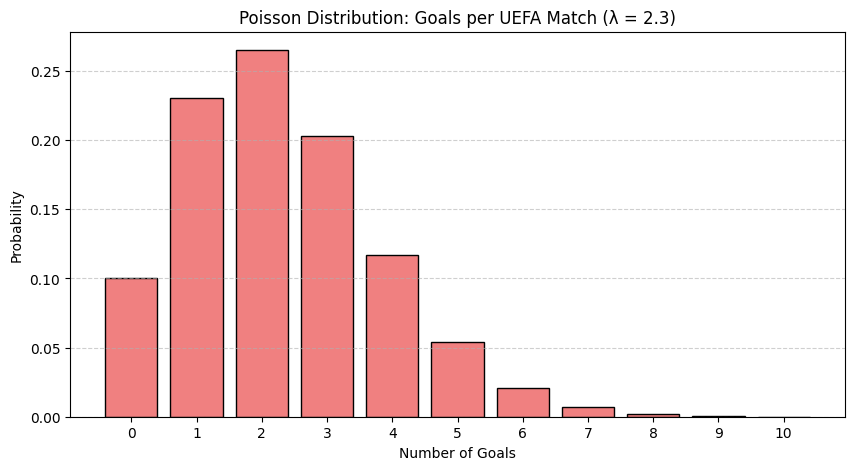

In [25]:
# Values from 0 to 10 (number of goals)
x = np.arange(0, 11)
# Compute Poisson probabilities manually
poisson_probs = [(math.exp(-λ) * λ**k) / math.factorial(k) for k in x]

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(x, poisson_probs, color='lightcoral', edgecolor='black')
plt.title("Poisson Distribution: Goals per UEFA Match (λ = 2.3)")
plt.xlabel("Number of Goals")
plt.ylabel("Probability")
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()